# Лабораторная работа 6. Цифровая обработка изображений

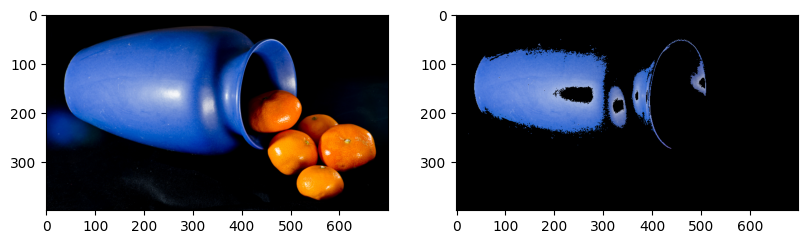

In [1]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import data
from scipy import ndimage
import matplotlib.pyplot as plt

# load image
originImg = cv.imread('/content/lab56.jpg')
dimensions = (700, 400)
originImg = cv.resize(originImg, dimensions, interpolation=cv.INTER_AREA)
rgbImg = cv.cvtColor(originImg, cv.COLOR_BGR2RGB)


# Mean-shift algorithm
flatImg = np.reshape(rgbImg, [-1, 3])
bandwidth = estimate_bandwidth(flatImg, quantile=0.1, n_samples=100)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(flatImg)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
segmentedImg = cluster_centers[np.reshape(labels, rgbImg.shape[:2])]

# create mask
blueMask = (segmentedImg[:, :, 0] < 250) & (segmentedImg[:, :, 1] > 74) & (segmentedImg[:, :, 2] > 50)

# use mask
blueObjects = np.zeros_like(originImg)
blueObjects[blueMask] = originImg[blueMask]

mask = cv.cvtColor(blueObjects, cv.COLOR_BGR2GRAY)
kernel = np.ones((5, 5), np.uint8)
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

# countours
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

result = rgbImg

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(originImg, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(blueObjects, cv.COLOR_BGR2RGB))
plt.show()